# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
#import datetime as dt
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
cities_found = []
lat = []
lon = []
temp_max = []
humidity = []
clouds = []
wind = []
country = []
date = []

url = "http://api.openweathermap.org/data/2.5/weather?"
units  = "imperial"

record_number = 1
set_number = 1
for city in cities:
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
    weather = requests.get(query_url).json()
    if weather["cod"] == 200:
        cities_found.append(city)
        lat.append(weather['coord']['lat'])
        lon.append(weather['coord']['lon'])
        temp_max.append(weather['main']['temp_max'])
        humidity.append(weather['main']['humidity'])
        clouds.append(weather['clouds']['all'])
        wind.append(weather['wind']['speed'])
        country.append(weather['sys']['country'])
        date.append(weather['dt'])
        print (f"Processing Record {record_number} of set {set_number} | {city}")
    else:
        print("City not found. Skipping...")
    
    record_number += 1
    set_number +=1
    
        


Processing Record 1 of set 1 | cayenne
Processing Record 2 of set 2 | rikitea
Processing Record 3 of set 3 | bredasdorp
Processing Record 4 of set 4 | enid
Processing Record 5 of set 5 | olinda
Processing Record 6 of set 6 | qaanaaq
Processing Record 7 of set 7 | saskylakh
Processing Record 8 of set 8 | beringovskiy
City not found. Skipping...
Processing Record 10 of set 10 | tessalit
Processing Record 11 of set 11 | nome
Processing Record 12 of set 12 | hasaki
Processing Record 13 of set 13 | okhotsk
Processing Record 14 of set 14 | gizo
Processing Record 15 of set 15 | sao joao da barra
City not found. Skipping...
Processing Record 17 of set 17 | simoes
Processing Record 18 of set 18 | kodiak
Processing Record 19 of set 19 | new norfolk
Processing Record 20 of set 20 | thompson
Processing Record 21 of set 21 | yellowknife
Processing Record 22 of set 22 | barrow
City not found. Skipping...
Processing Record 24 of set 24 | busselton
Processing Record 25 of set 25 | mataura
Processing R

Processing Record 198 of set 198 | coihaique
Processing Record 199 of set 199 | tura
Processing Record 200 of set 200 | graham
Processing Record 201 of set 201 | vanderhoof
Processing Record 202 of set 202 | paamiut
Processing Record 203 of set 203 | kattivakkam
Processing Record 204 of set 204 | pisco
Processing Record 205 of set 205 | lompoc
Processing Record 206 of set 206 | mahebourg
Processing Record 207 of set 207 | nanortalik
Processing Record 208 of set 208 | macheng
City not found. Skipping...
Processing Record 210 of set 210 | bonavista
Processing Record 211 of set 211 | tarauaca
Processing Record 212 of set 212 | tuktoyaktuk
Processing Record 213 of set 213 | matagami
Processing Record 214 of set 214 | castro
City not found. Skipping...
Processing Record 216 of set 216 | jimenez
Processing Record 217 of set 217 | viedma
City not found. Skipping...
Processing Record 219 of set 219 | puebloviejo
Processing Record 220 of set 220 | cananeia
Processing Record 221 of set 221 | vic

Processing Record 389 of set 389 | tyrma
Processing Record 390 of set 390 | smithers
Processing Record 391 of set 391 | camacha
Processing Record 392 of set 392 | broome
Processing Record 393 of set 393 | sitka
Processing Record 394 of set 394 | cairns
City not found. Skipping...
Processing Record 396 of set 396 | loviisa
City not found. Skipping...
Processing Record 398 of set 398 | maragogi
City not found. Skipping...
City not found. Skipping...
Processing Record 401 of set 401 | muisne
Processing Record 402 of set 402 | kiunga
Processing Record 403 of set 403 | buluang
Processing Record 404 of set 404 | bella vista
Processing Record 405 of set 405 | medicine hat
Processing Record 406 of set 406 | denpasar
Processing Record 407 of set 407 | talnakh
Processing Record 408 of set 408 | southport
City not found. Skipping...
Processing Record 410 of set 410 | coahuayana
Processing Record 411 of set 411 | aksu
Processing Record 412 of set 412 | merauke
Processing Record 413 of set 413 | qu

Processing Record 580 of set 580 | ca mau
Processing Record 581 of set 581 | yelizovo
Processing Record 582 of set 582 | santa marta
Processing Record 583 of set 583 | sivas
City not found. Skipping...
Processing Record 585 of set 585 | palauig
Processing Record 586 of set 586 | baykit
Processing Record 587 of set 587 | mbour
Processing Record 588 of set 588 | guerrero negro
Processing Record 589 of set 589 | vila
Processing Record 590 of set 590 | abonnema
Processing Record 591 of set 591 | evanston
Processing Record 592 of set 592 | buin
Processing Record 593 of set 593 | svetlyy
Processing Record 594 of set 594 | aquiraz
City not found. Skipping...
Processing Record 596 of set 596 | krupina
Processing Record 597 of set 597 | ewa beach
Processing Record 598 of set 598 | yatou
Processing Record 599 of set 599 | uberaba
Processing Record 600 of set 600 | presidencia roque saenz pena
Processing Record 601 of set 601 | huainan
Processing Record 602 of set 602 | casa nova
City not found. 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_dict = {'City': cities_found,
                'Lat' : lat,
                'Lng' : lon,
                "Max_Temp" : temp_max,
                "Humidity" : humidity,
                "Cloudiness" : clouds,
                "Wind_Speed" : wind,
                "Country" : country,
                "Date" : date}

weather_df = pd.DataFrame(weather_dict)
weather_df.to_csv("../output_data/cities10.csv", index_label='City_ID', header=True)
weather_df

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,cayenne,4.9333,-52.3333,73.40,94,20,3.44,GF,1619582009
1,rikitea,-23.1203,-134.9692,76.73,74,100,11.65,PF,1619581917
2,bredasdorp,-34.5322,20.0403,46.40,93,71,3.44,ZA,1619582135
3,enid,36.3956,-97.8784,64.40,82,20,8.05,US,1619582135
4,olinda,-8.0089,-34.8553,75.20,88,75,4.61,BR,1619581724
...,...,...,...,...,...,...,...,...,...
552,huainan,32.6264,116.9969,74.64,28,93,9.89,CN,1619582331
553,casa nova,-9.4167,-41.1333,78.80,69,40,5.75,BR,1619582331
554,hakui,36.8833,136.7833,64.40,59,75,13.80,JP,1619582332
555,fomboni,-12.2800,43.7425,81.95,75,100,4.79,KM,1619582332


In [5]:
summary_all=weather_df.describe()
summary_all

,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Date
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,5.570000e+02
mean,20.160583,12.355870,61.529479,69.825853,54.824057,7.089892,1.619582e+09
std,33.181235,92.094585,19.267247,22.913354,37.866311,4.586081,1.163938e+02
min,-54.800000,-179.166700,14.000000,8.000000,0.000000,0.290000,1.619582e+09
25%,-8.008900,-68.399000,46.400000,59.000000,20.000000,3.440000,1.619582e+09
50%,22.690600,19.064700,63.390000,74.000000,65.000000,5.910000,1.619582e+09
75%,48.587200,95.322200,76.780000,88.000000,90.000000,9.510000,1.619582e+09
max,78.218600,179.316700,101.160000,100.000000,100.000000,30.000000,1.619582e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
num_hum_gret_100 = len(weather_df.loc[weather_df['Humidity']<100])
print(type(num_hum_gret_100))
print(num_hum_gret_100)


<class 'int'>
542


In [7]:
num_hum_gret_100 = len(weather_df.loc[weather_df['Humidity']<100])

if num_hum_gret_100 > 0:
    weather_hum_df = weather_df.loc[weather_df['Humidity']<100]
    summary_all=weather_hum_df.describe()
    
summary_all


,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Date
count,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,5.420000e+02
mean,20.372725,13.350730,61.639317,68.990775,55.101476,7.141052,1.619582e+09
std,33.137122,92.398019,19.323052,22.663534,37.749280,4.612332,1.171975e+02
min,-54.800000,-179.166700,14.000000,8.000000,0.000000,0.290000,1.619582e+09
25%,-7.606250,-68.485625,46.400000,58.250000,20.000000,3.440000,1.619582e+09
50%,22.790750,20.710800,63.695000,74.000000,65.000000,5.990000,1.619582e+09
75%,48.540425,96.992500,77.000000,87.000000,91.000000,9.682500,1.619582e+09
max,78.218600,179.316700,101.160000,99.000000,100.000000,30.000000,1.619582e+09


In [8]:
#  Get the indices of cities that have humidity over 100%.

humidity_index = weather_df[weather_df['Humidity'] == 100].index

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = weather_df.drop(humidity_index, inplace = False)

In [10]:
clean_city_data.head()


,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,cayenne,4.9333,-52.3333,73.40,94,20,3.44,GF,1619582009
1,rikitea,-23.1203,-134.9692,76.73,74,100,11.65,PF,1619581917
2,bredasdorp,-34.5322,20.0403,46.40,93,71,3.44,ZA,1619582135
3,enid,36.3956,-97.8784,64.40,82,20,8.05,US,1619582135
4,olinda,-8.0089,-34.8553,75.20,88,75,4.61,BR,1619581724


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [14]:

timestamp = clean_city_data.Date[0]

dt_object = datetime.fromtimestamp(timestamp)
year = dt_object.year
month= dt_object.month
day= dt_object.day

date = str(month) + "/" + str(day) + "/" + str(year)
date

'4/27/2021'

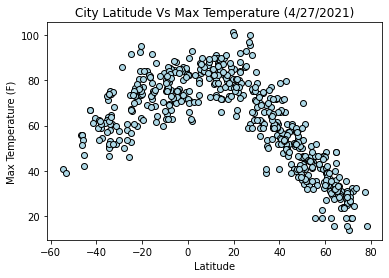

In [15]:
x_axis = clean_city_data.Lat
y_axis = clean_city_data.Max_Temp
plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", edgecolors="black")
plt.title(f"City Latitude Vs Max Temperature ({date})" )
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

## Latitude vs. Humidity Plot

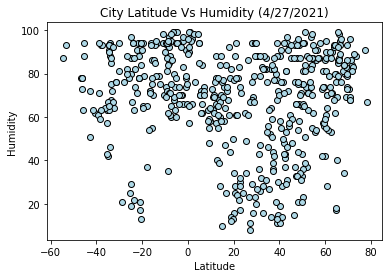

In [16]:
x_axis = clean_city_data.Lat
y_axis = clean_city_data.Humidity
plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", edgecolors="black")
plt.title(f"City Latitude Vs Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

## Latitude vs. Cloudiness Plot

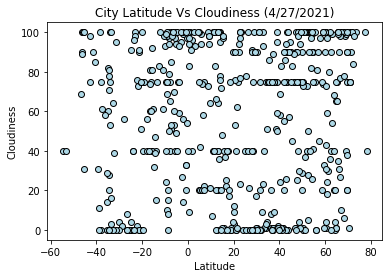

In [17]:
x_axis = clean_city_data.Lat
y_axis = clean_city_data.Cloudiness
plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", edgecolors="black")
plt.title(f"City Latitude Vs Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

## Latitude vs. Wind Speed Plot

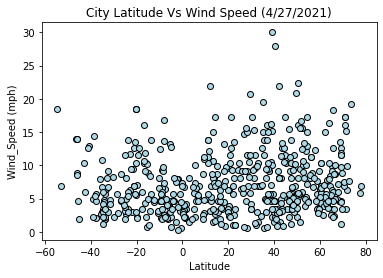

In [18]:
x_axis = clean_city_data.Lat
y_axis = clean_city_data.Wind_Speed
plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", edgecolors="black")
plt.title(f"City Latitude Vs Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed (mph)")
plt.show()

## Linear Regression

In [19]:
clean_city_data_north = clean_city_data.loc[weather_df['Lat'] >= 0 ]
clean_city_data_north
clean_city_data_south = clean_city_data.loc[weather_df['Lat'] < 0 ]
clean_city_data_south

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
1,rikitea,-23.1203,-134.9692,76.73,74,100,11.65,PF,1619581917
2,bredasdorp,-34.5322,20.0403,46.40,93,71,3.44,ZA,1619582135
4,olinda,-8.0089,-34.8553,75.20,88,75,4.61,BR,1619581724
12,gizo,-8.1030,156.8419,79.16,85,97,16.82,SB,1619582137
13,sao joao da barra,-21.6403,-41.0511,70.83,94,73,9.48,BR,1619582138
...,...,...,...,...,...,...,...,...,...
546,aquiraz,-3.9014,-38.3911,82.99,74,75,8.05,BR,1619582328
550,uberaba,-19.7483,-47.9319,62.47,64,0,2.10,BR,1619582330
551,presidencia roque saenz pena,-26.7852,-60.4388,53.69,80,0,4.79,AR,1619582330
553,casa nova,-9.4167,-41.1333,78.80,69,40,5.75,BR,1619582331


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.9


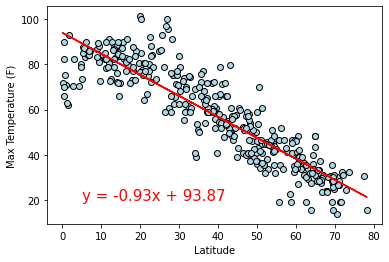

In [20]:
x_axis = clean_city_data_north.Lat
y_axis = clean_city_data_north.Max_Temp

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5,20),fontsize=15,color="red")

plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-value is: {round(rvalue,2)}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.68


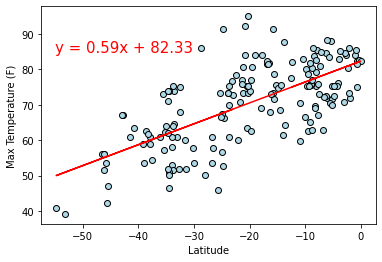

In [21]:
x_axis = clean_city_data_south.Lat
y_axis = clean_city_data_south.Max_Temp

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,85),fontsize=15,color="red")

plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-value is: {round(rvalue,2)}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.16


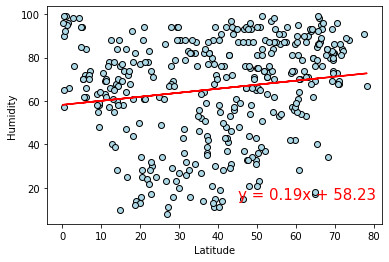

In [22]:
x_axis = clean_city_data_north.Lat
y_axis = clean_city_data_north.Humidity

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(45,15),fontsize=15,color="red")

plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {round(rvalue,2)}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.14


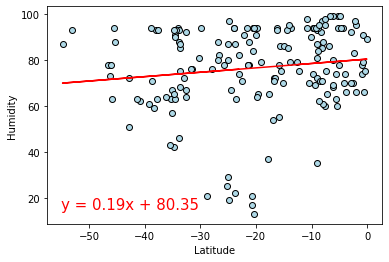

In [23]:
x_axis = clean_city_data_south.Lat
y_axis = clean_city_data_south.Humidity

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")

plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {round(rvalue,2)}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.12


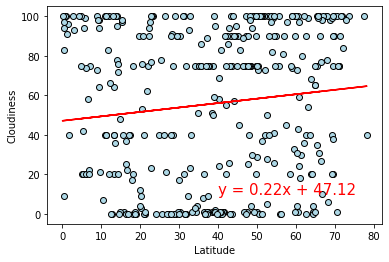

In [24]:
x_axis = clean_city_data_north.Lat
y_axis = clean_city_data_north.Cloudiness

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")


plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {round(rvalue,2)}")
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2


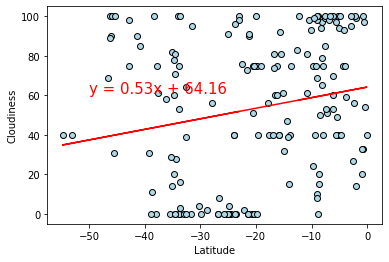

In [25]:
x_axis = clean_city_data_south.Lat
y_axis = clean_city_data_south.Cloudiness

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,61),fontsize=15,color="red")


plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {round(rvalue,2)}")
plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.13


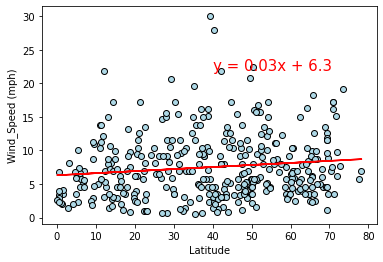

In [26]:
x_axis = clean_city_data_north.Lat
y_axis = clean_city_data_north.Wind_Speed

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(40,22),fontsize=15,color="red")

plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed (mph)")
print(f"The r-value is: {round(rvalue,2)}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.15


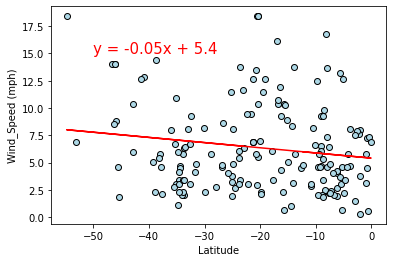

In [28]:
x_axis = clean_city_data_south.Lat
y_axis = clean_city_data_south.Wind_Speed

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")

plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed (mph)")
print(f"The r-value is: {round(rvalue,2)}")
plt.show()